## Tree based classification models: Customer Churn Analysis



## Part 0: Imports and Read in the Data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Statistical summary of the numeric columns with .describe()**

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**.describe() shows that many columns are categorical, meaning they will eventually need to be converted to dummy variables.**

# Part 2:  Exploratory Data Analysis

## General Feature Exploration


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

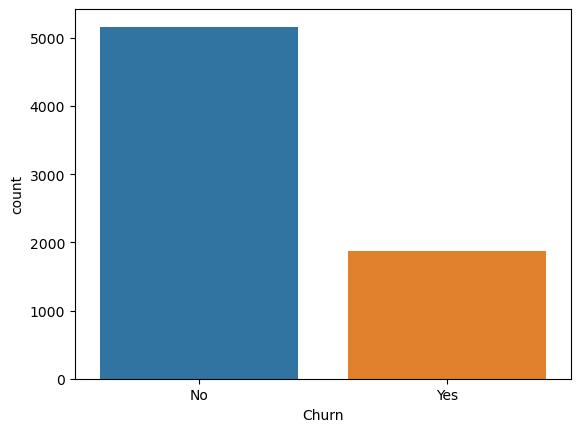

In [7]:
sns.countplot(data=df, x='Churn', hue='Churn')

**A boxplot showing the distribution of TotalCharges per Contract type, with hue coloring based on the Churn class.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

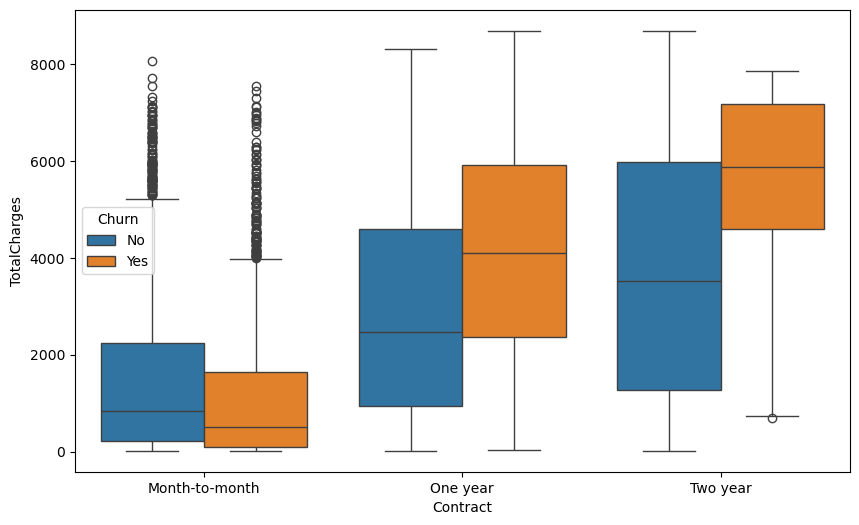

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

**Let's Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

***you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [9]:
# creating a bar plot to show the correlation betweeen the selected features below
# categorical features need to be converted to numerical values via dummy variables
# and you should avoid using features with too many unique values like 'customerID'

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',  'Churn']


In [10]:
filtered_df = df[cols]

In [11]:
df_dummy = pd.get_dummies(filtered_df)

In [12]:
df_dummy.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,True,False,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,True,False
1,0,False,True,True,False,True,False,False,True,True,...,True,False,True,False,False,False,False,True,True,False
2,0,False,True,True,False,True,False,False,True,True,...,False,False,False,True,False,False,False,True,False,True
3,0,False,True,True,False,True,False,True,False,False,...,True,False,True,False,True,False,False,False,True,False
4,0,True,False,True,False,True,False,False,True,True,...,False,False,False,True,False,False,True,False,False,True


In [13]:
corr_df = df_dummy.corr()
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


In [14]:
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

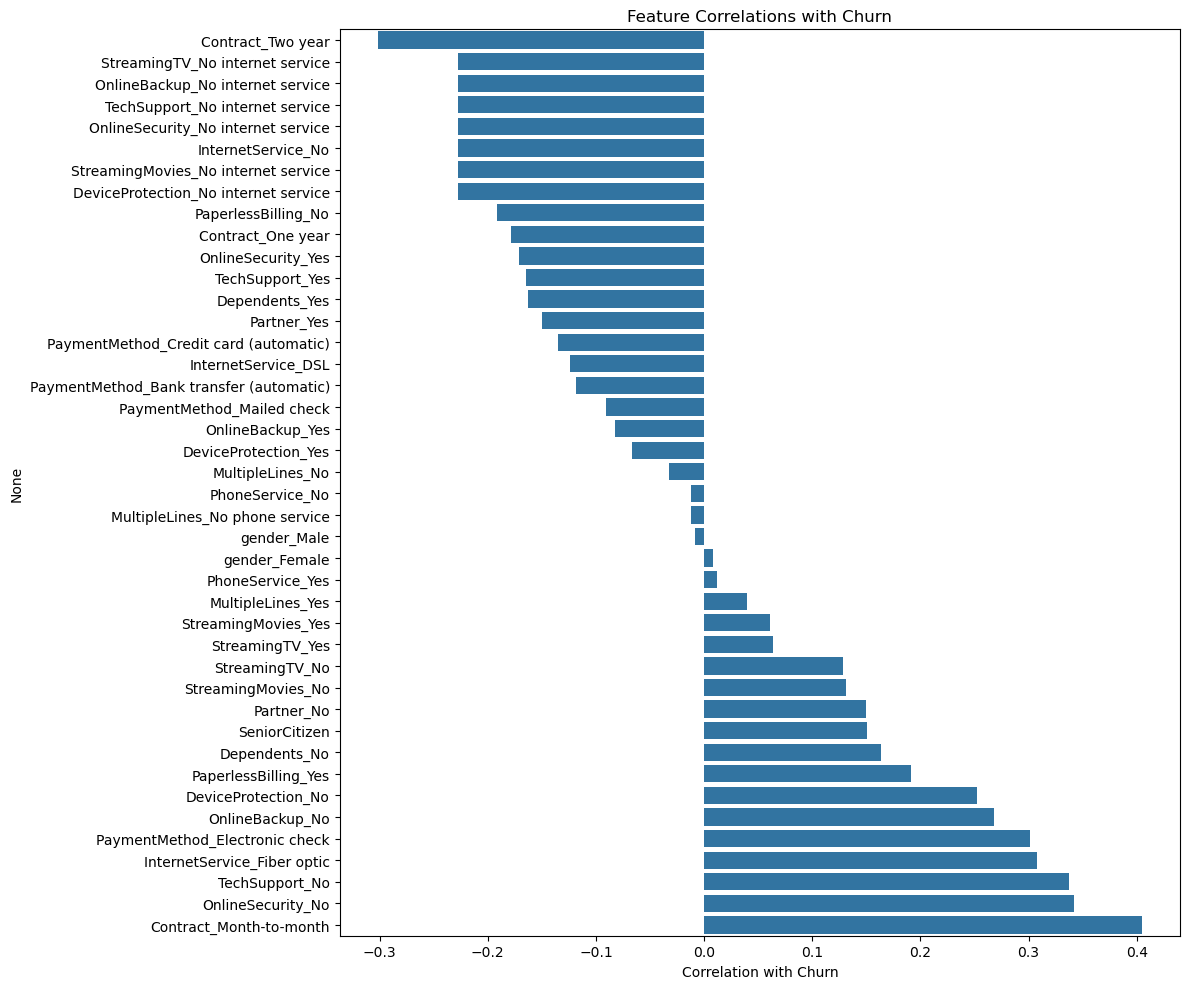

In [15]:
# Calculate correlations with Churn_Yes and sort by absolute value
correlations = corr_df['Churn_Yes'].drop(['Churn_Yes', 'Churn_No']).sort_values()

# Create bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel('Correlation with Churn')
plt.title('Feature Correlations with Churn')
plt.tight_layout()


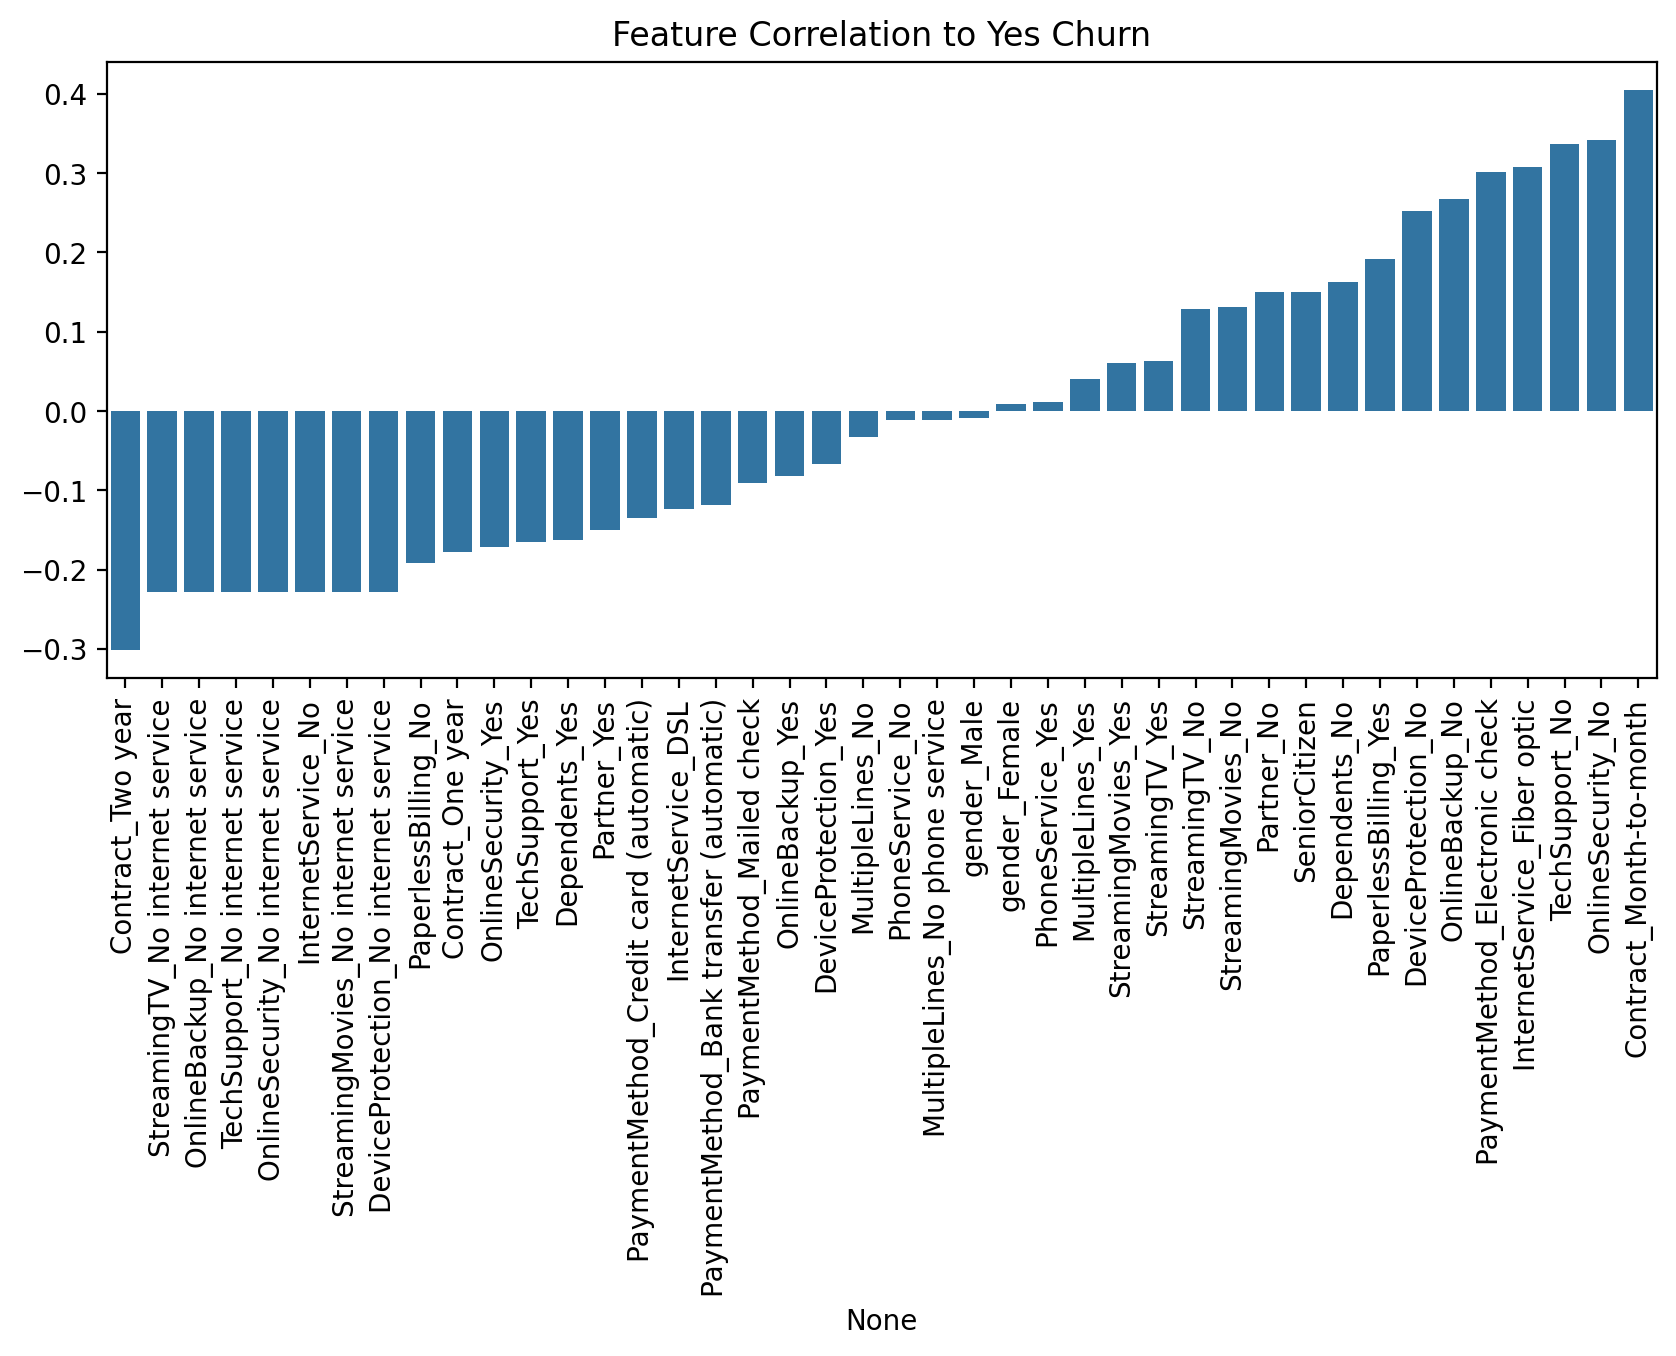

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=correlations.index,y=correlations.values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

In [17]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**A histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Figure size 2400x1600 with 0 Axes>

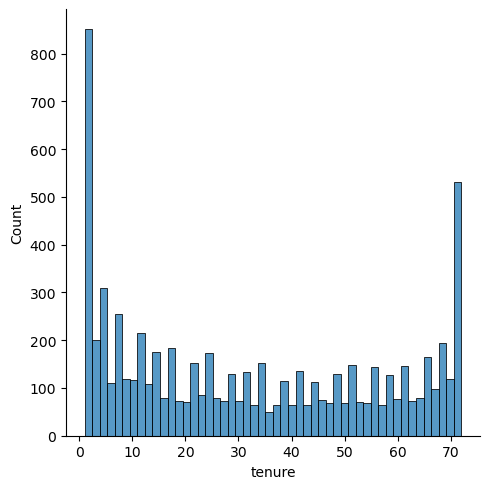

In [18]:
plt.figure(figsize=(12,8), dpi=200)
sns.displot(data=df, x='tenure', bins=50)

**histograms separated by two additional features, Churn and Contract.**

<Figure size 1600x800 with 0 Axes>

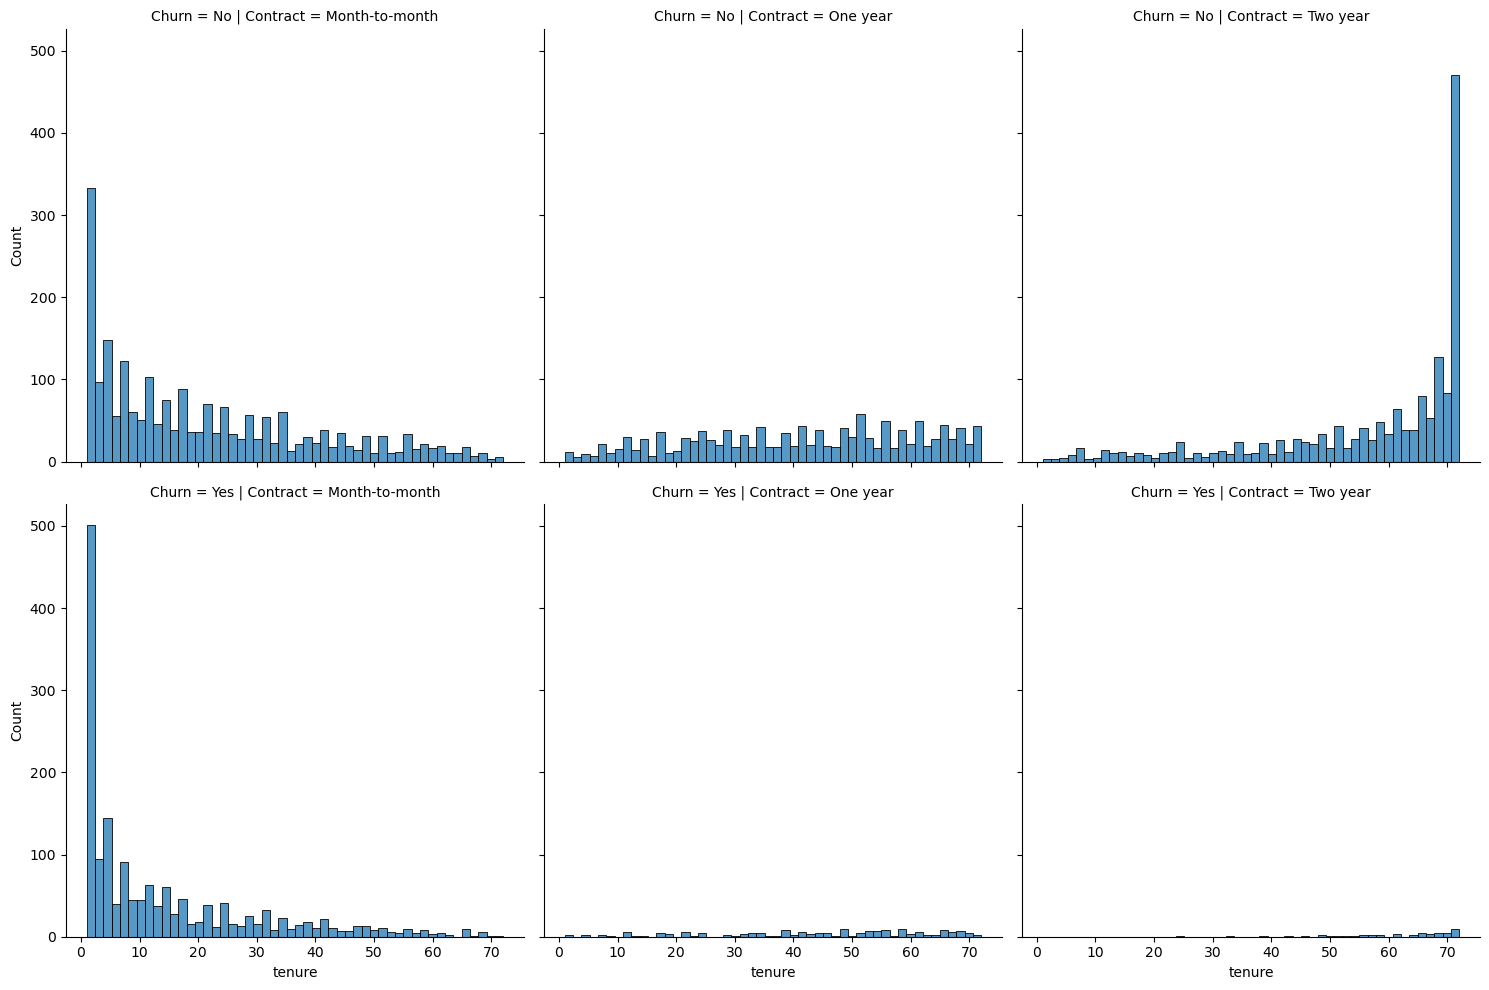

In [19]:
plt.figure(figsize=(8,4), dpi=200)
sns.displot(data=df, x='tenure', bins=50, row='Churn', col='Contract')

**A scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

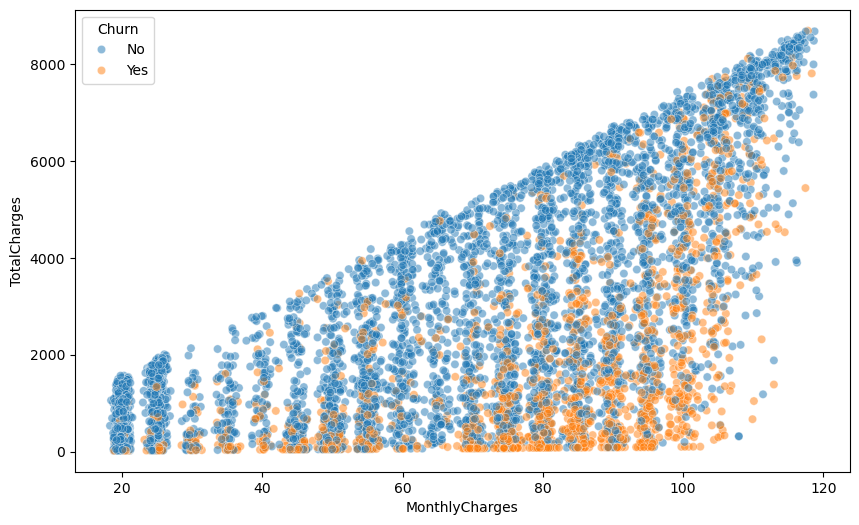

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.5)

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. The results should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [21]:
df['tenure'].head()

0     1
1    34
2     2
3    45
4     2
Name: tenure, dtype: int64

In [22]:
df.groupby(['Churn', 'tenure']).count()

customerID  gender  SeniorCitizen  Partner  Dependents  \
Churn tenure                                                           
No    1              233     233            233      233         233   
      2              115     115            115      115         115   
      3              106     106            106      106         106   
      4               93      93             93       93          93   
      5               69      69             69       69          69   
...                  ...     ...            ...      ...         ...   
Yes   68               9       9              9        9           9   
      69               8       8              8        8           8   
      70              11      11             11       11          11   
      71               6       6              6        6           6   
      72               6       6              6        6           6   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Churn tenure                                                                 
No    1                233            233              233             233   
      2                115            115              115             115   
      3                106            106              106             106   
      4                 93             93               93              93   
      5                 69             69               69              69   
...                    ...            ...              ...             ...   
Yes   68                 9              9                9               9   
      69                 8              8                8               8   
      70                11             11               11              11   
      71                 6              6                6               6   
      72                 6              6                6               6   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Churn tenure                                                             
No    1                233               233          233          233   
      2                115               115          115          115   
      3                106               106          106          106   
      4                 93                93           93           93   
      5                 69                69           69           69   
...                    ...               ...          ...          ...   
Yes   68                 9                 9            9            9   
      69                 8                 8            8            8   
      70                11                11           11           11   
      71                 6                 6            6            6   
      72                 6                 6            6            6   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
Churn tenure                                                               
No    1                   233       233               233            233   
      2                   115       115               115            115   
      3                   106       106               106            106   
      4                    93        93                93             93   
      5                    69        69                69             69   
...                       ...       ...               ...            ...   
Yes   68                    9         9                 9              9   
      69                    8         8                 8              8   
      70                   11        11                11             11   
      71                    6         6                 6              6   
      72                    6         6                 6              6   

              MonthlyCharges  TotalCharges  
Churn tenure                                
No    1             

In [23]:
df.groupby(['Churn', 'tenure']).count().transpose()

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
customerID        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 144 columns]

In [24]:
df.groupby(['Churn','tenure']).count().transpose()['No']


tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [25]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [26]:
churn_rate = 100 * yes_churn / (yes_churn+no_churn)

In [27]:
churn_rate

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [28]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Now that we have Churn Rate per tenure group 1-72 months, let's create a plot showing churn rate per months of tenure.**

In [29]:
churn_rate.head()



tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [30]:
# selecting the first row (the customers) and checking the churn rates
churn_rate.iloc[0]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

<Axes: xlabel='tenure', ylabel='Churn Percentage'>

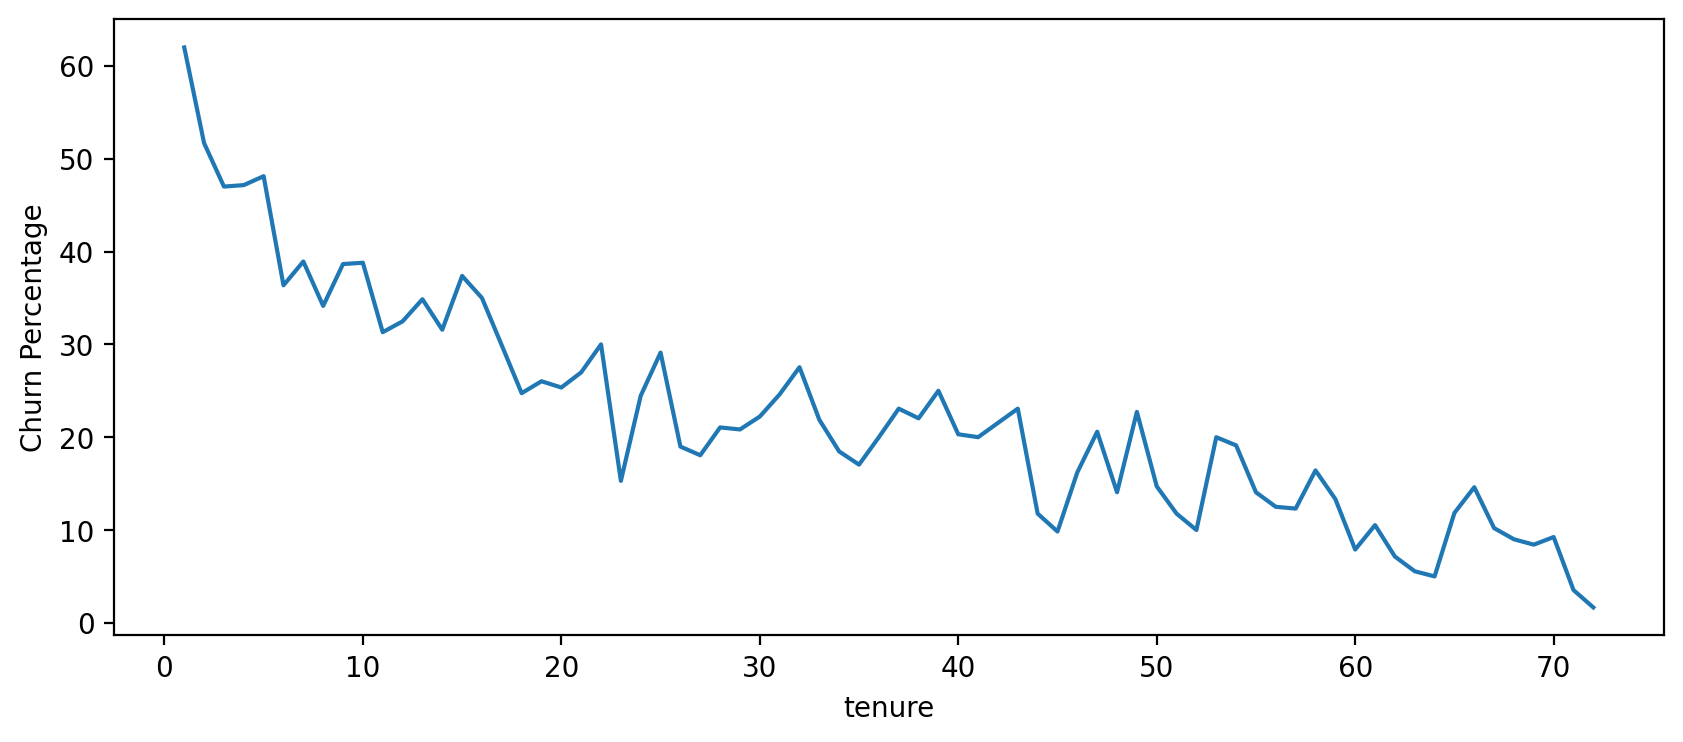

In [ ]:
# This is a new way to plot
# the dataframe with the tenure as index is used then.plot() instead of plt.plot()
# The index becomes the X axis
# and the values become the y axis
plt.figure(figsize=(10,4),dpi=200)
plt.ylabel('Churn Percentage');
churn_rate.iloc[0].plot()


### Broader Cohort Groups
**creating a new column called Tenure Cohort that creates 4 separate categories based on tenure valeus:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [ ]:
# Define the bins and labels
bins = [0, 12, 24, 48, float('inf')]  # float('inf') for values greater than 48
labels = ['0-12 Months', '12-24 Months', '24-48 Months', 'over 48 Months']

In [33]:
# Create a new column 'categories' based on the bins
df['Tenure Cohort'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=False)

In [34]:
df[['tenure', 'Tenure Cohort']].head(10)

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,over 48 Months


**Scatterplot for Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

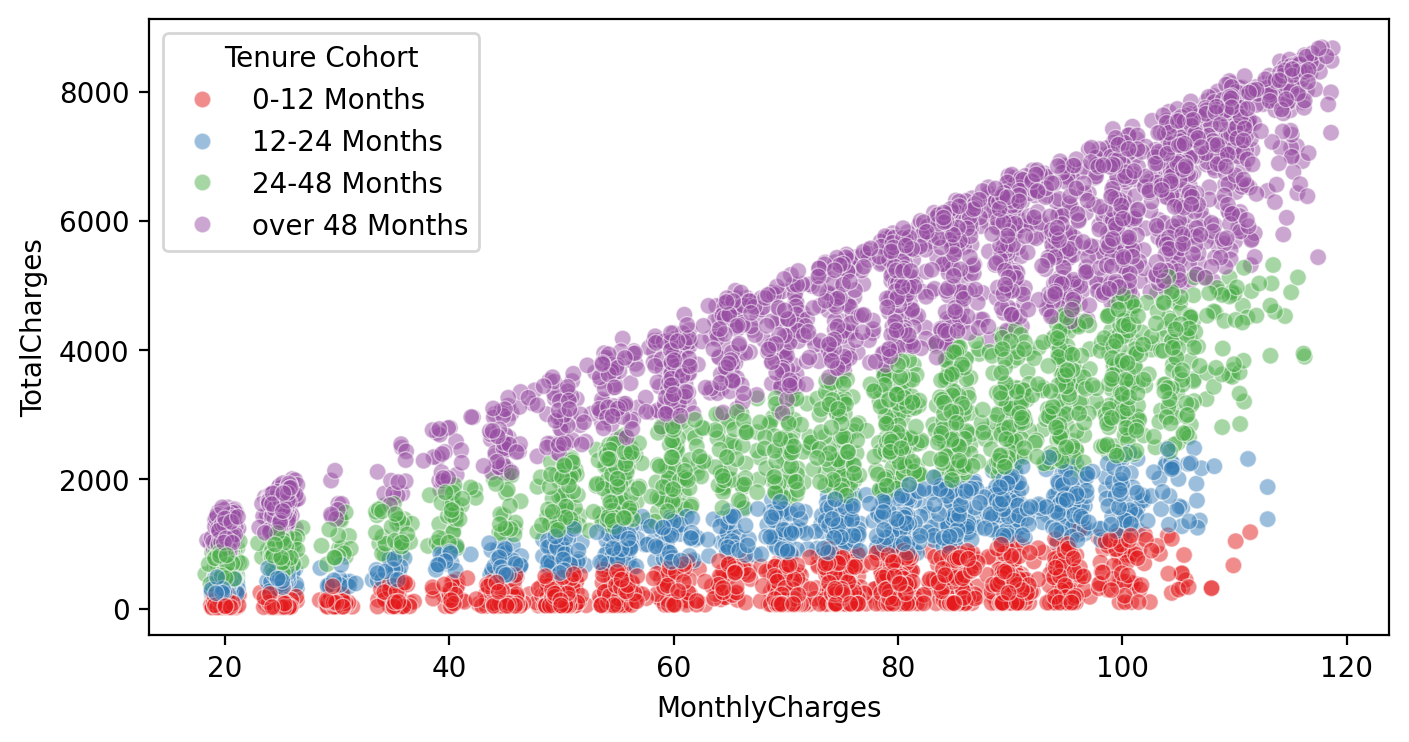

In [35]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', palette='Set1', alpha=0.5)

**A count plot showing the churn count per cohort.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

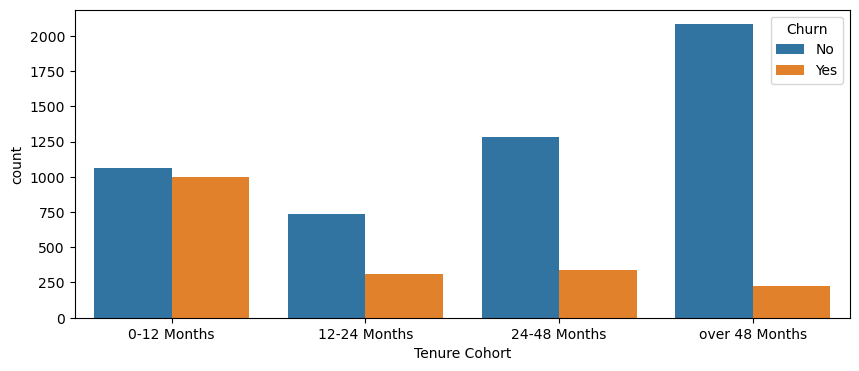

In [36]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')

**Creating a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

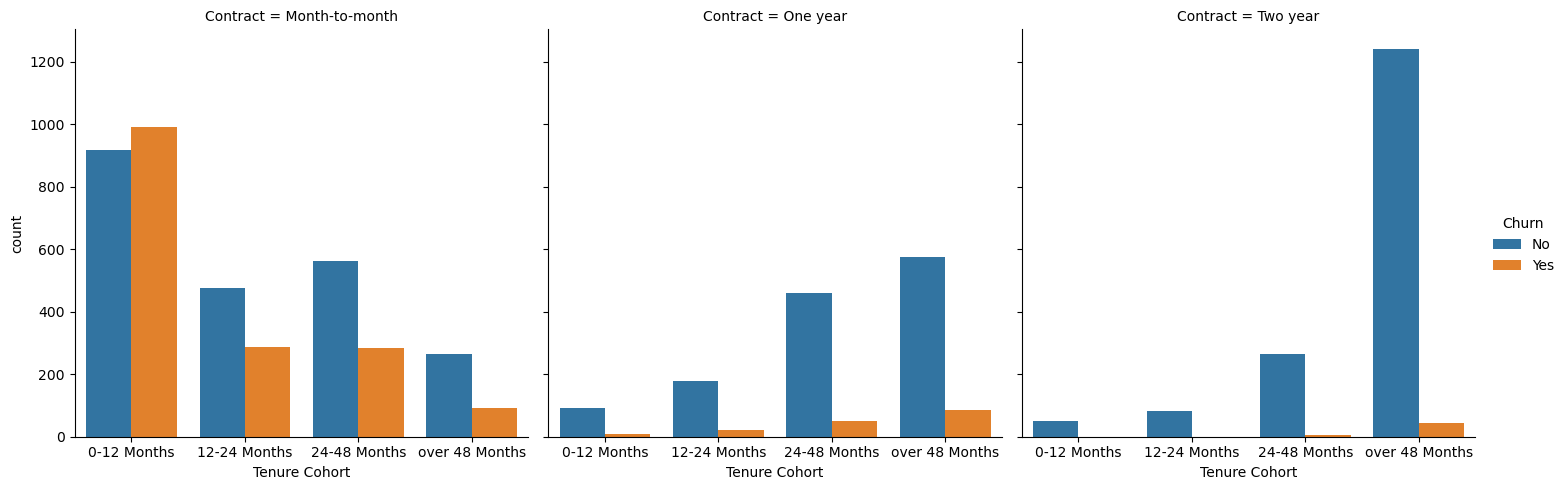

In [38]:
sns.catplot(data=df, x='Tenure Cohort', hue='Churn', col='Contract', kind='count')

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

In [39]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [40]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure Cohort_12-24 Months', 'Tenure Cohort_24-48 Months',
       'Tenure Cohort_over 48 Months'],
      dtype='object')

In [41]:
y = df['Churn']

**Train/Test split**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Decision Tree Perfomance.**
   1. Train a single decision tree model with grid search.
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. Plot the tree.

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt_model = DecisionTreeClassifier()

In [46]:
dt_model.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
# help(DecisionTreeClassifier())

In [49]:
param_grid = {
    'criterion' : ["gini", "entropy"],
    'max_depth' : [None, 8, 10, 15, 20]
}

In [50]:
dt_grid_model = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy')

In [51]:
dt_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 8, 10, 15, 20]},
             scoring='accuracy')

In [52]:
dt_grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [53]:
dt_grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [54]:
dt_grid_model.cv_results_['mean_test_score']

array([0.73088099, 0.77528364, 0.75963796, 0.73293695, 0.73483069,
       0.72471224, 0.77860205, 0.76390449, 0.74241388, 0.72929459])

In [55]:
final_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [56]:
final_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [57]:
dt_preds = final_dt_model.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [59]:
print(classification_report(y_test, dt_preds))

              precision    recall  f1-score   support

          No       0.88      0.87      0.87       557
         Yes       0.53      0.54      0.54       147

    accuracy                           0.80       704
   macro avg       0.70      0.71      0.70       704
weighted avg       0.81      0.80      0.80       704



In [60]:
cm = confusion_matrix(y_test, dt_preds)

In [61]:
cm

array([[485,  72],
       [ 67,  80]], dtype=int64)

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_dt_model.classes_)

In [63]:
disp

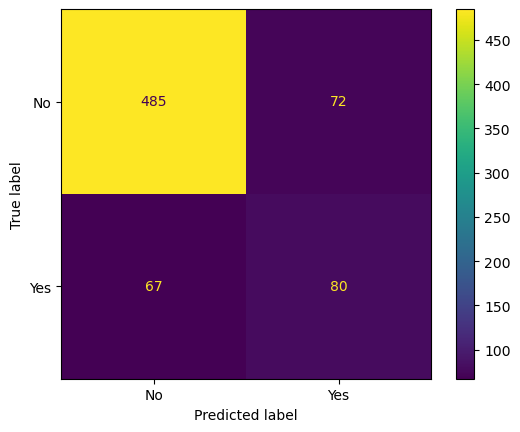

In [64]:
disp.plot()
plt.show()

In [65]:
# what about the base model? the model with default parameters

In [66]:
base_dt_model = DecisionTreeClassifier()

In [67]:
base_dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
base_dt_preds = base_dt_model.predict(X_test)

In [69]:
print(classification_report(y_test, base_dt_preds))

              precision    recall  f1-score   support

          No       0.86      0.78      0.82       557
         Yes       0.38      0.52      0.44       147

    accuracy                           0.72       704
   macro avg       0.62      0.65      0.63       704
weighted avg       0.76      0.72      0.74       704



In [70]:
cm2 = confusion_matrix(y_test, base_dt_preds)

In [71]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=base_dt_model.classes_)

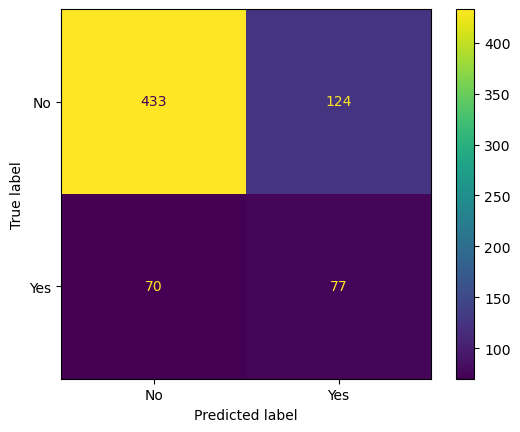

In [72]:
disp2.plot()
plt.show()

In [73]:
# looks like the base model is worse than the model with grid search parameters

In [74]:
# now lets show the feature importances of the best model found 

In [75]:
len(final_dt_model.feature_importances_)

33

In [76]:
final_dt_model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure Cohort_12-24 Months', 'Tenure Cohort_24-48 Months',
       'Tenure Cohort_over 48 Months'], dtype=object)

In [77]:
len(final_dt_model.feature_names_in_)

33

In [78]:
len(df.columns)

22

In [79]:
# Create a DataFrame to show feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': final_dt_model.feature_names_in_,
    'Importance': final_dt_model.feature_importances_
})


In [80]:
feature_importance_df

,Feature,Importance
0,SeniorCitizen,0.020249
1,tenure,0.125658
2,MonthlyCharges,0.098413
3,TotalCharges,0.106111
4,gender_Male,0.003481
5,Partner_Yes,0.001566
6,Dependents_Yes,0.002881
7,PhoneService_Yes,0.007702
8,MultipleLines_No phone service,0.000000
9,MultipleLines_Yes,0.005393


In [81]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

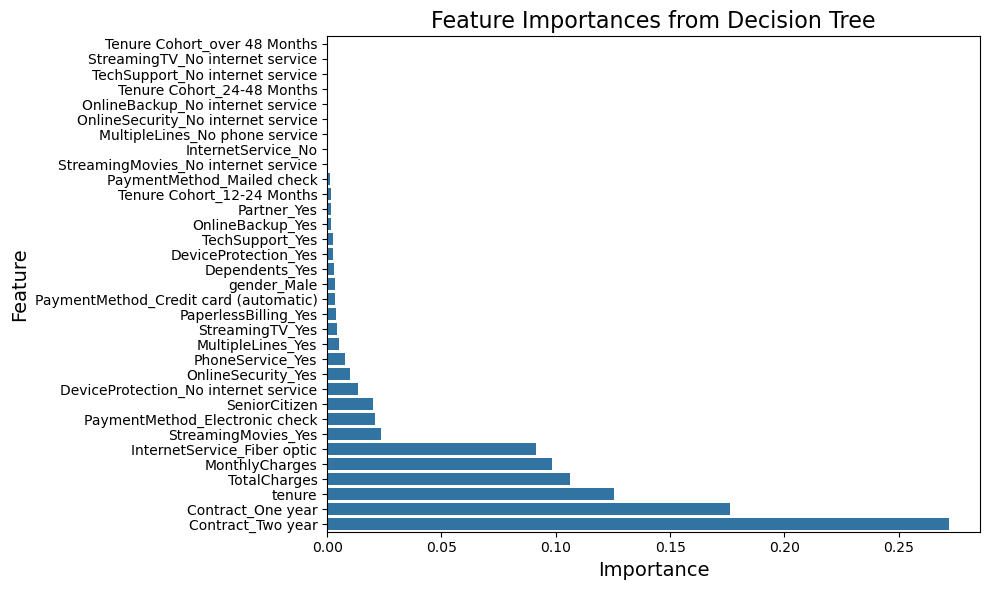

In [131]:
# Create a barplot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# Add a title and labels
plt.title('Feature Importances from Decision Tree', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [83]:
# plt.xticks(rotation=45, ha='right'): This rotates the labels by 45 degrees and adjusts the alignment 
# (ha='right' ensures the labels don't get cut off).

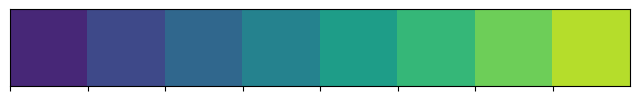

In [84]:
# checking color palettes
sns.color_palette("viridis", 8)  # Example with 8 different hues
sns.palplot(sns.color_palette("viridis", 8))  # Visualize the colors

# some options include
# 'viridis', 'coolwarm', 'Blues', 'RdYlBu', 'Set2', 'Spectral', 'Paired'

In [85]:
from sklearn.tree import plot_tree


In [86]:
# Plot the decision tree
feature_names = final_dt_model.feature_names_in_.tolist()
class_names = final_dt_model.classes_.tolist()


In [87]:
class_names

['No', 'Yes']

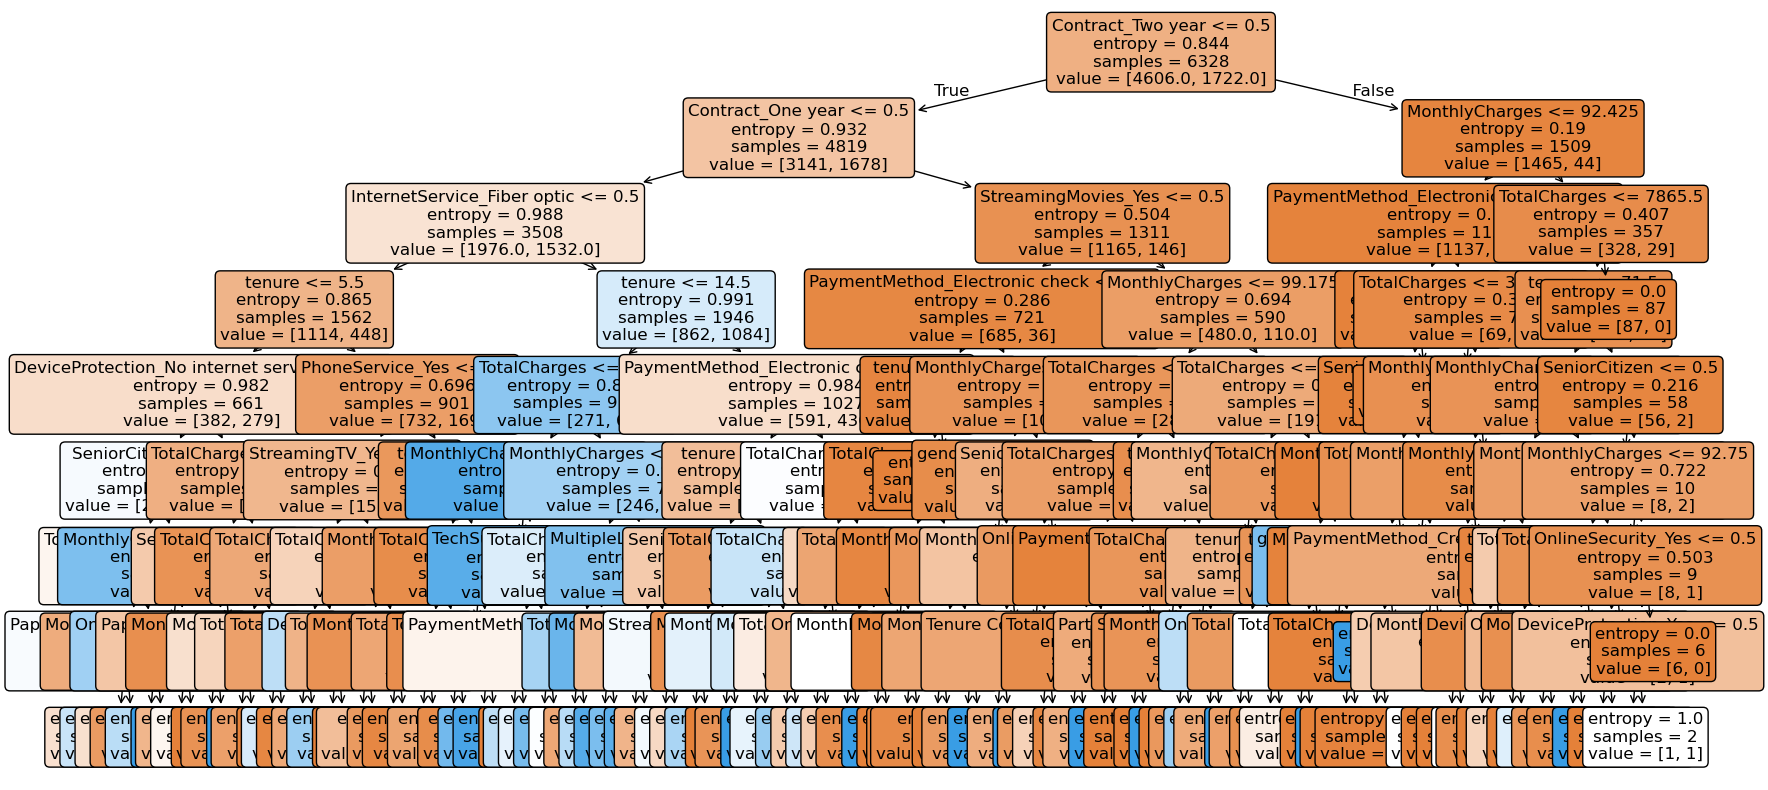

In [88]:
# Plot the decision tree
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(final_dt_model, 
          feature_names=feature_names,  # Use the list of feature names
          #class_names=class_names,  # You can specify your class names
          filled=True,  # Colors the nodes by purity
          rounded=True,  # Rounded corners for aesthetics
          fontsize=12)  # Font size for readability

plt.show()

## Random Forest

**Creating a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
rf_model = RandomForestClassifier()

In [91]:
# help(RandomForestClassifier)

In [92]:
rf_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [93]:
n_estimators=[5, 15, 25, 64, 100,150]
criterion=['gini', 'entropy']
max_depth=[None, 5, 10, 18, 30]
max_features= [2,3,4, 'sqrt']
bootstrap = [True,False]
oob_score = [True,False]
random_state=[101]

In [94]:
param_grid = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_depth': max_depth,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
    'random_state': random_state,
}

In [95]:
rf_grid_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy')

In [ ]:
rf_grid_model.fit(X_train, y_train)

In [97]:
rf_grid_model.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 3,
 'n_estimators': 100,
 'oob_score': True,
 'random_state': 101}

In [98]:
# usually adding more trees have the same perfromance with less trees
# lets experiment the error vs number of trees

In [99]:
from sklearn.metrics import accuracy_score

In [ ]:
error = []
z=100
for n in range(20, z+1):
    rf_model2 = RandomForestClassifier(n_estimators=n, criterion='entropy', max_depth=10, 
                                      max_features=3, bootstrap=True, oob_score=True, random_state=101)
    rf_model2.fit(X_train, y_train)
    rf_preds = rf_model2.predict(X_test)
    err = 1 - accuracy_score(y_test, rf_preds)
    error.append(err)

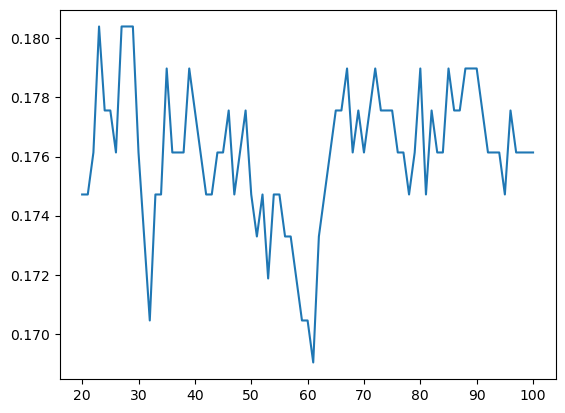

In [101]:
plt.plot(range(20, z+1), error)

In [ ]:
# lets create our final model with 61 estimators

In [103]:
final_rf_model = RandomForestClassifier(n_estimators=61, criterion='entropy', max_depth=10, 
                                      max_features=3, bootstrap=True, oob_score=True, random_state=101)

In [104]:
final_rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=3,
                       n_estimators=61, oob_score=True, random_state=101)

In [105]:
rf_preds = final_rf_model.predict(X_test)

In [106]:
print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.90       557
         Yes       0.62      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



In [107]:
cm = confusion_matrix(y_test, rf_preds, labels=final_rf_model.classes_)

In [108]:
disp = ConfusionMatrixDisplay(cm)

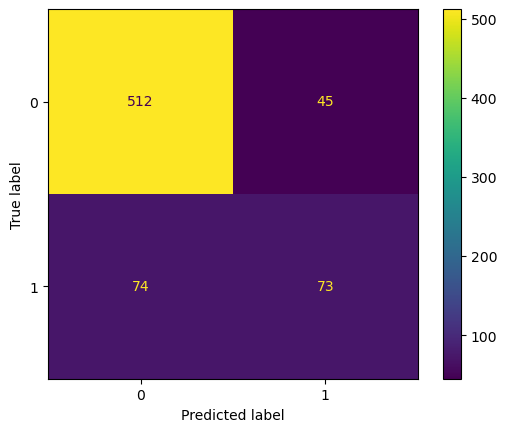

In [109]:
disp.plot()
plt.show()

## Boosted Trees

**Lets Use AdaBoost or Gradient Boosting to create models and report back the classification report and plot a confusion matrix for its predicted results**

In [110]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [111]:
ada_model = AdaBoostClassifier(random_state=101)

In [112]:
grad_model = GradientBoostingClassifier(random_state=101)

In [ ]:
ada_model.fit(X_train, y_train)

In [114]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=101)

In [115]:
ada_preds = ada_model.predict(X_test)

In [116]:
grad_preds = grad_model.predict(X_test)

In [117]:
# adaboost results
print("AdaBoost Classifier Results:")
print(classification_report(y_test, ada_preds))

AdaBoost Classifier Results:
              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [118]:
# gradient boosting results
print("Gradient Boosting Classifier Results:")
print(classification_report(y_test, grad_preds))

Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.58      0.50      0.54       147

    accuracy                           0.82       704
   macro avg       0.73      0.70      0.71       704
weighted avg       0.81      0.82      0.82       704



In [119]:
# since adaptive boosting had better results, lets plot the confusion matrix for ada_preds

In [120]:
cm = confusion_matrix(y_test, ada_preds)

In [121]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_model.classes_)

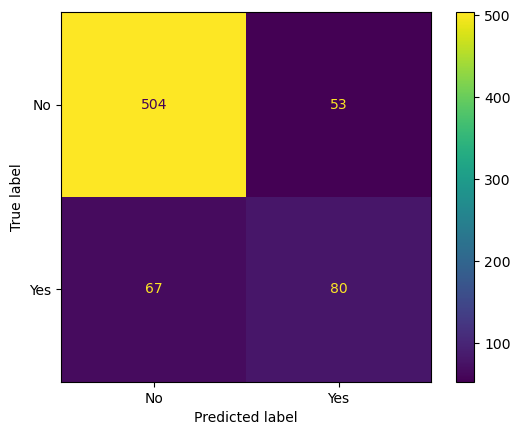

In [122]:
disp.plot()
plt.show()

In [123]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.